## Wine's Quality prediction

After importing the libraries that will be used, check how the first five rows look:

In [88]:
#Libraries
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import GradientBoostingClassifier
import warnings

warnings.filterwarnings('ignore')
sns.set(style="white", palette="muted", color_codes=True)

wine = pd.read_csv('Desktop/datasets/winered.csv', sep =';')
wine.head()


,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5


Using some pandas' methods, let's start the cleaning process:

In [89]:
wine.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1599 entries, 0 to 1598
Data columns (total 12 columns):
fixed acidity           1599 non-null float64
volatile acidity        1599 non-null float64
citric acid             1599 non-null float64
residual sugar          1599 non-null float64
chlorides               1599 non-null float64
free sulfur dioxide     1599 non-null float64
total sulfur dioxide    1599 non-null float64
density                 1599 non-null float64
pH                      1599 non-null float64
sulphates               1599 non-null float64
alcohol                 1599 non-null float64
quality                 1599 non-null int64
dtypes: float64(11), int64(1)
memory usage: 150.0 KB


In [90]:
wine.describe()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
count,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000
mean,8.319637,0.527821,0.270976,2.538806,0.087467,15.874922,46.467792,0.996747,3.311113,0.658149,10.422983,5.636023
std,1.741096,0.179060,0.194801,1.409928,0.047065,10.460157,32.895324,0.001887,0.154386,0.169507,1.065668,0.807569
min,4.600000,0.120000,0.000000,0.900000,0.012000,1.000000,6.000000,0.990070,2.740000,0.330000,8.400000,3.000000
25%,7.100000,0.390000,0.090000,1.900000,0.070000,7.000000,22.000000,0.995600,3.210000,0.550000,9.500000,5.000000
50%,7.900000,0.520000,0.260000,2.200000,0.079000,14.000000,38.000000,0.996750,3.310000,0.620000,10.200000,6.000000
75%,9.200000,0.640000,0.420000,2.600000,0.090000,21.000000,62.000000,0.997835,3.400000,0.730000,11.100000,6.000000
max,15.900000,1.580000,1.000000,15.500000,0.611000,72.000000,289.000000,1.003690,4.010000,2.000000,14.900000,8.000000


As shown above, the dataset **does not have null values**. Also, it does not appear to have any abnormal value on its columns.
In this project, the skickit-learn will be used to predict the wine's quality. It is important to notice that **all columns have numeric values** so no transformation will be needed.
After the cleaning process, let's start to explore the dataset columns and see how the data is arranged:

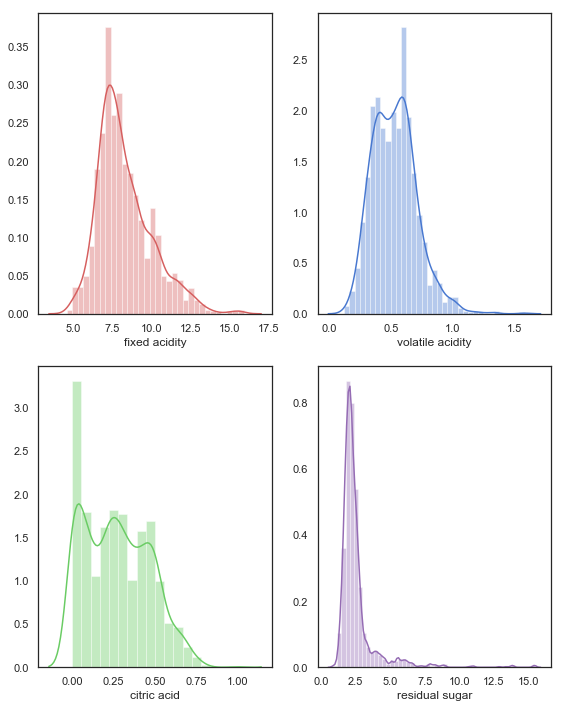

In [91]:
#Plotting columns distribution
f, axes = plt.subplots(2, 2, figsize=(8, 10))
sns.distplot(wine['fixed acidity'], color = 'r', ax=axes[0,0])
sns.distplot(wine['volatile acidity'], color = 'b', ax=axes[0,1])
sns.distplot(wine['citric acid'], color = 'g', ax=axes[1,0])
sns.distplot(wine['residual sugar'], color = 'm', ax=axes[1,1])
plt.tight_layout()

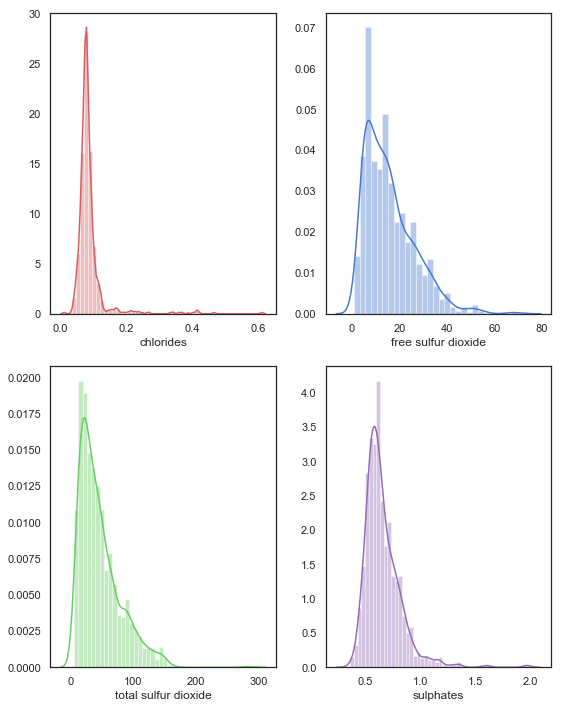

In [92]:
#Plotting columns distribution
f, axes = plt.subplots(2, 2, figsize=(8, 10))
sns.distplot(wine['chlorides'], color = 'r', ax=axes[0,0])
sns.distplot(wine['free sulfur dioxide'], color = 'b', ax=axes[0,1])
sns.distplot(wine['total sulfur dioxide'], color = 'g', ax=axes[1,0])
sns.distplot(wine['sulphates'], color = 'm', ax=axes[1,1])
plt.tight_layout()

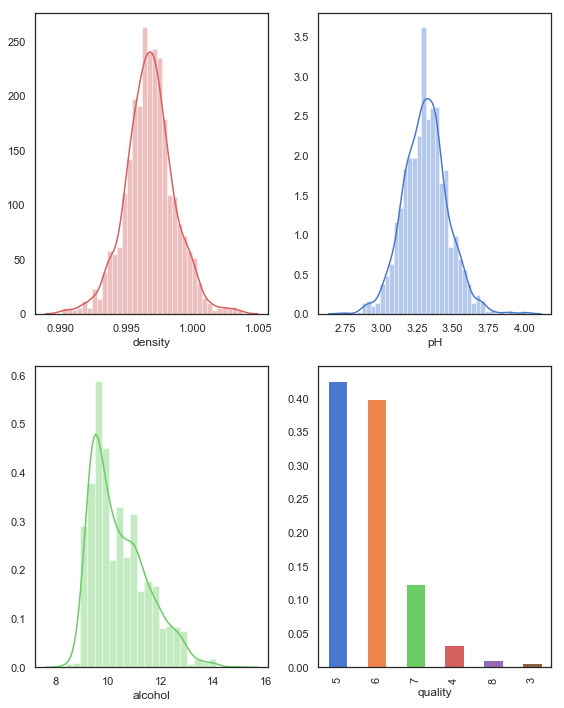

In [93]:
#Plotting columns distribution
f, axes = plt.subplots(2, 2, figsize=(8, 10))
sns.distplot(wine['density'], color = 'r', ax=axes[0,0])
sns.distplot(wine['pH'], color = 'b', ax=axes[0,1])
sns.distplot(wine['alcohol'], color = 'g', ax=axes[1,0])
_ = wine['quality'].value_counts(normalize=True).plot(ax=axes[1,1], kind='bar')
_.set_xlabel('quality')
plt.tight_layout()

From the last figure, it is clear that the dataset has some **imbalanced classes**.
Let's keep them **without any changes** for now, and check the results:

In [94]:
y = wine['quality'].values
X = wine.drop('quality', axis =1).values


X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, random_state = 42, stratify = y)

lr = LogisticRegression(multi_class='multinomial', solver = 'lbfgs')
tree = DecisionTreeClassifier()
rf = RandomForestClassifier()
gb = GradientBoostingClassifier()

models_list = [lr, tree, rf, gb]

for model in models_list:
    model.fit(X_train, y_train)
    print(model, model.score(X_test, y_test))

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='multinomial',
          n_jobs=None, penalty='l2', random_state=None, solver='lbfgs',
          tol=0.0001, verbose=0, warm_start=False) 0.56875
DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=None,
            max_features=None, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, presort=False, random_state=None,
            splitter='best') 0.5708333333333333
RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=None, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=10, n_jobs=None,
            oob_

The Logistic Regressor and the Decision Tree are weak learners, meaning that they are slightly better than a random choice. The other two models did a little better with a 64% chance of getting the right value.

Now, let's try to make the models perform better using oversampling:

Since the dataset has imbalanced classes, the 'resample' class from sklearn will be used to copy some of the data that is insufficient.

#### Oversampling:

In [95]:
wine.quality.value_counts()

5    681
6    638
7    199
4     53
8     18
3     10
Name: quality, dtype: int64

In [101]:
from sklearn.utils import resample

y = wine['quality']
X = wine.drop('quality', axis =1)

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, random_state = 42, stratify = y)

X = pd.concat([X_train, y_train], axis = 1)


class_3 = X[X.quality == 3]
class_4 = X[X.quality == 4]
class_5 = X[X.quality == 5]
class_6 = X[X.quality == 6]
class_7 = X[X.quality == 7]
class_8 = X[X.quality == 8]

wine_upsampled_class3 = resample(class_3,
                          replace=True, 
                         n_samples = len(class_7), 
                          random_state = 42)

wine_upsampled_class8 = resample(class_8,
                          replace=True, 
                         n_samples = len(class_7), 
                          random_state = 42)

wine_upsampled_class4 = resample(class_4,
                          replace=True, 
                         n_samples = len(class_7), 
                          random_state = 42)

upsampled = pd.concat([class_5, wine_upsampled_class3, wine_upsampled_class8, wine_upsampled_class4, class_6, class_7])

upsampled.quality.value_counts()

y_train = upsampled.quality
X_train = upsampled.drop('quality', axis=1)

lr = LogisticRegression(multi_class='multinomial', solver = 'lbfgs')
tree = DecisionTreeClassifier()
rf = RandomForestClassifier()
gb = GradientBoostingClassifier()

models_list = [lr, tree, rf, gb]

for model in models_list:
    model.fit(X_train, y_train)
    print(model, model.score(X_test, y_test))

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='multinomial',
          n_jobs=None, penalty='l2', random_state=None, solver='lbfgs',
          tol=0.0001, verbose=0, warm_start=False) 0.6770833333333334
DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=None,
            max_features=None, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, presort=False, random_state=None,
            splitter='best') 0.7166666666666667
RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=None, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=10, n_jobs=None,
     

As shown, the models performed better with oversampling. Now, the new best value is 76%

The second arrangement attempted was to separate the quality into only 3 values: 0, 1, and 2 meaning 'bad', 'regular', and 'good'. Since those will have more similarity among themselves.

In [97]:
def scoring(quality):
    '''
    number -> number
    returns 0, 1, 2 depending on the quality
    '''
    if quality == 3 or quality == 4:
        return 0
    elif quality == 5 or quality == 6:
        return 1
    else:
        return 2
        

In [98]:
wine['score'] = wine.quality.apply(scoring)

In [99]:
wine.score.value_counts()

1    1319
2     217
0      63
Name: score, dtype: int64

In [100]:
y = wine['score'].values
X = wine.drop(['quality', 'score'], axis =1).values
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, random_state = 42, stratify = y)

lr = LogisticRegression(multi_class='multinomial', solver = 'lbfgs')
tree = DecisionTreeClassifier()
rf = RandomForestClassifier()
gb = GradientBoostingClassifier()

models_list = [lr, tree, rf, gb]

for model in models_list:
    model.fit(X_train, y_train)
    print(model, model.score(X_test, y_test))

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='multinomial',
          n_jobs=None, penalty='l2', random_state=None, solver='lbfgs',
          tol=0.0001, verbose=0, warm_start=False) 0.8395833333333333
DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=None,
            max_features=None, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, presort=False, random_state=None,
            splitter='best') 0.79375
RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=None, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=10, n_jobs=None,
            oob_

Finally, the RandomForestClassifier had a score of 87% which a great improvement in our output.